#  Import usefull packages

In [49]:
import spotipy
import pandas as pd
import json
import pprint
import config
from itertools import *
from bs4 import BeautifulSoup as bs
import sys
import random
import requests
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
sp= spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id,client_secret=config.client_secret))

In [50]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

# load the big_df
     songs of the audio features (minimum 500 songs as diverse as possible))

In [29]:
first_db= pd.read_csv("6383_rows.csv")

In [30]:
first_db

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.865,0.665,-6.289,0.073,0.04530,0.000000,0.2240,0.331,111.113,1ofhfV90EnYhEr7Un2fWiv,268827
1,0.801,0.910,-6.566,0.225,0.00239,0.000891,0.0737,0.805,87.277,5g9lS8deSIxItFBmZRC4vN,278387
2,0.644,0.846,-5.443,0.275,0.12400,0.000000,0.3530,0.503,79.182,1qZqFtSINOOmjYH1UE9805,301600
3,0.802,0.787,-6.009,0.206,0.00127,0.000181,0.0763,0.806,90.189,7sKt5Y2zJpYw78iAxndB8y,296907
4,0.872,0.723,-5.968,0.247,0.02930,0.000000,0.3270,0.843,93.279,4VQNCzfZ3MdHEwwErNXpBo,307773
...,...,...,...,...,...,...,...,...,...,...,...
197,0.760,0.585,-7.307,0.161,0.01020,0.000468,0.3080,0.455,91.179,6uWez0py1zc17F7hjp7jIt,311040
198,0.888,0.584,-13.308,0.112,0.03850,0.000003,0.0625,0.762,104.705,5vpDsiVqiZLRwKAzQO708k,334440
199,0.916,0.844,-3.967,0.236,0.03940,0.000000,0.0778,0.586,95.190,0Z2J91b2iTGLVTZC4fKgxf,312627
200,0.711,0.693,-8.208,0.410,0.10600,0.000000,0.0821,0.906,177.978,0LfoVjNyrzkCLzarDAazCh,229305


## Drop id 

In [31]:
first_db_id=first_db[["id"]]
first_db.drop("id",axis=1, inplace=True)

In [32]:
first_db

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.865,0.665,-6.289,0.073,0.04530,0.000000,0.2240,0.331,111.113,268827
1,0.801,0.910,-6.566,0.225,0.00239,0.000891,0.0737,0.805,87.277,278387
2,0.644,0.846,-5.443,0.275,0.12400,0.000000,0.3530,0.503,79.182,301600
3,0.802,0.787,-6.009,0.206,0.00127,0.000181,0.0763,0.806,90.189,296907
4,0.872,0.723,-5.968,0.247,0.02930,0.000000,0.3270,0.843,93.279,307773
...,...,...,...,...,...,...,...,...,...,...
197,0.760,0.585,-7.307,0.161,0.01020,0.000468,0.3080,0.455,91.179,311040
198,0.888,0.584,-13.308,0.112,0.03850,0.000003,0.0625,0.762,104.705,334440
199,0.916,0.844,-3.967,0.236,0.03940,0.000000,0.0778,0.586,95.190,312627
200,0.711,0.693,-8.208,0.410,0.10600,0.000000,0.0821,0.906,177.978,229305


In [33]:
first_db_id

,id
0,1ofhfV90EnYhEr7Un2fWiv
1,5g9lS8deSIxItFBmZRC4vN
2,1qZqFtSINOOmjYH1UE9805
3,7sKt5Y2zJpYw78iAxndB8y
4,4VQNCzfZ3MdHEwwErNXpBo
...,...
197,6uWez0py1zc17F7hjp7jIt
198,5vpDsiVqiZLRwKAzQO708k
199,0Z2J91b2iTGLVTZC4fKgxf
200,0LfoVjNyrzkCLzarDAazCh


# standardise the data 
    using standardscaler (using fit and then transform)
    
**for the K-Means is a distance based algorithm:** we need to scale / normalize!:

In [34]:
first_db.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.741698,0.705505,-6.034099,0.223382,0.122358,0.004191,0.212269,0.580998,108.609891,257267.193069
std,0.131033,0.140705,2.615964,0.107463,0.145109,0.025642,0.157729,0.207884,30.072417,54667.030597
min,0.342000,0.252000,-15.225000,0.035700,0.000008,0.000000,0.013700,0.035200,53.952000,127880.000000
25%,0.651000,0.603500,-7.306500,0.137500,0.024850,0.000000,0.089425,0.457500,90.119250,224137.000000
50%,0.764000,0.719500,-5.692500,0.232500,0.059650,0.000000,0.153000,0.598000,95.894500,250433.000000
75%,0.844500,0.805750,-4.269500,0.300000,0.169250,0.000003,0.307250,0.759500,114.215000,287270.250000
max,0.965000,0.956000,-0.140000,0.530000,0.705000,0.306000,0.876000,0.956000,206.247000,530253.000000


In [35]:
scaler = StandardScaler()
scaler.fit(first_db)
first_db_scaled = scaler.transform(first_db)
first_db_scaled_df = pd.DataFrame(first_db_scaled, columns = first_db.columns)
display(first_db.head())
print()
display(first_db_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.865,0.665,-6.289,0.073,0.04530,0.000000,0.2240,0.331,111.113,268827
1,0.801,0.910,-6.566,0.225,0.00239,0.000891,0.0737,0.805,87.277,278387
2,0.644,0.846,-5.443,0.275,0.12400,0.000000,0.3530,0.503,79.182,301600
3,0.802,0.787,-6.009,0.206,0.00127,0.000181,0.0763,0.806,90.189,296907
4,0.872,0.723,-5.968,0.247,0.02930,0.000000,0.3270,0.843,93.279,307773


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.943339,-0.288587,-0.097683,-1.402856,-0.532355,-0.163835,0.074557,-1.205573,0.083443,0.211984
1,0.453698,1.456974,-0.203834,0.015092,-0.828799,-0.129001,-0.880708,1.080211,-0.711146,0.387295
2,-0.747452,1.000991,0.226520,0.481522,0.011344,-0.163835,0.894446,-0.376132,-0.980999,0.812975
3,0.461349,0.580631,0.009618,-0.162152,-0.836536,-0.156759,-0.864184,1.085034,-0.614073,0.726915
4,0.996894,0.124648,0.025330,0.220321,-0.642891,-0.163835,0.729197,1.263460,-0.511066,0.926176


In [36]:
first_db.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.741698,0.705505,-6.034099,0.223382,0.122358,0.004191,0.212269,0.580998,108.609891,257267.193069
std,0.131033,0.140705,2.615964,0.107463,0.145109,0.025642,0.157729,0.207884,30.072417,54667.030597
min,0.342000,0.252000,-15.225000,0.035700,0.000008,0.000000,0.013700,0.035200,53.952000,127880.000000
25%,0.651000,0.603500,-7.306500,0.137500,0.024850,0.000000,0.089425,0.457500,90.119250,224137.000000
50%,0.764000,0.719500,-5.692500,0.232500,0.059650,0.000000,0.153000,0.598000,95.894500,250433.000000
75%,0.844500,0.805750,-4.269500,0.300000,0.169250,0.000003,0.307250,0.759500,114.215000,287270.250000
max,0.965000,0.956000,-0.140000,0.530000,0.705000,0.306000,0.876000,0.956000,206.247000,530253.000000


# save the scaler for future 
        use for the new user input song. save it using pickle

In [37]:
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

# choosing the number of clusters 
# fitting k means cluster
# build the elbow graph to find the best k

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

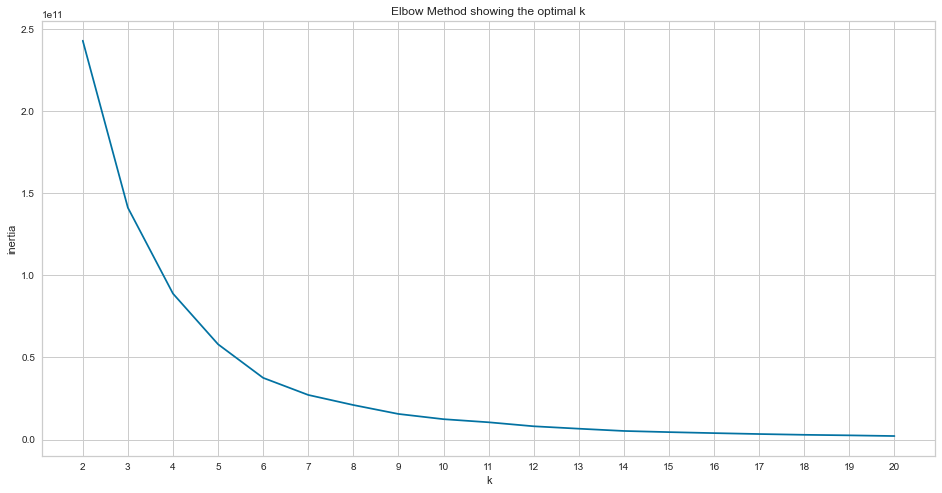

In [38]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(first_db)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


## Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

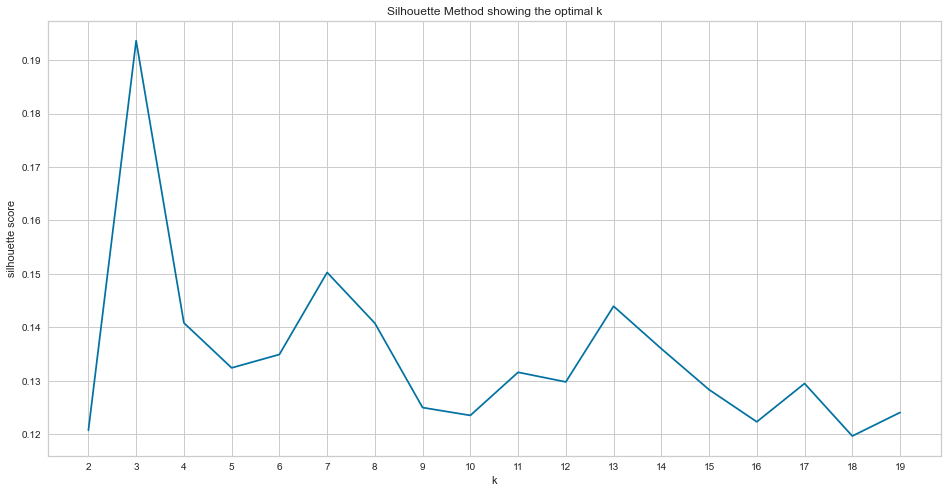

In [39]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(first_db_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(first_db_scaled_df, kmeans.predict(first_db_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

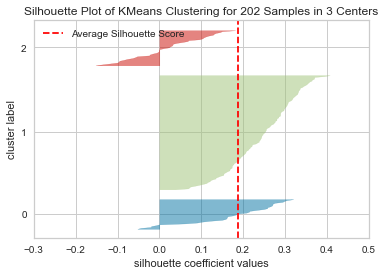

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 202 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(first_db_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# use the model with the best k 
    to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict 
    


In [41]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(first_db_scaled_df)

KMeans(n_clusters=6, random_state=1234)

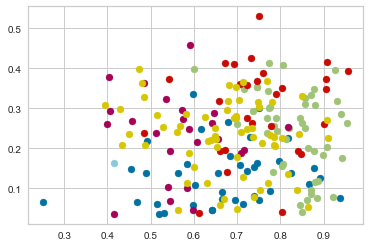

In [42]:
# assign a cluster to each example
labels = kmeans.predict(first_db_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(first_db.to_numpy()[row_ix, 1], first_db.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [43]:
clusters = kmeans.predict(first_db_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    39
1    47
2    28
3    24
4    63
5     1
dtype: int64

In [44]:
#first_db_df = pd.DataFrame(first_db)
first_db["cluster"] = clusters
first_db

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.865,0.665,-6.289,0.073,0.04530,0.000000,0.2240,0.331,111.113,268827,0
1,0.801,0.910,-6.566,0.225,0.00239,0.000891,0.0737,0.805,87.277,278387,4
2,0.644,0.846,-5.443,0.275,0.12400,0.000000,0.3530,0.503,79.182,301600,1
3,0.802,0.787,-6.009,0.206,0.00127,0.000181,0.0763,0.806,90.189,296907,4
4,0.872,0.723,-5.968,0.247,0.02930,0.000000,0.3270,0.843,93.279,307773,4
...,...,...,...,...,...,...,...,...,...,...,...
197,0.760,0.585,-7.307,0.161,0.01020,0.000468,0.3080,0.455,91.179,311040,0
198,0.888,0.584,-13.308,0.112,0.03850,0.000003,0.0625,0.762,104.705,334440,4
199,0.916,0.844,-3.967,0.236,0.03940,0.000000,0.0778,0.586,95.190,312627,4
200,0.711,0.693,-8.208,0.410,0.10600,0.000000,0.0821,0.906,177.978,229305,2


## save the model with the best k 
        as your final model using pickle.

In [45]:
with open("Model/kmeans_6.pickle", "wb") as f:
    pickle.dump(kmeans,f)

# Add the id column again

In [46]:
final_rec= pd.concat([first_db,first_db_id],axis=1)

In [47]:
final_rec

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.865,0.665,-6.289,0.073,0.04530,0.000000,0.2240,0.331,111.113,268827,0,1ofhfV90EnYhEr7Un2fWiv
1,0.801,0.910,-6.566,0.225,0.00239,0.000891,0.0737,0.805,87.277,278387,4,5g9lS8deSIxItFBmZRC4vN
2,0.644,0.846,-5.443,0.275,0.12400,0.000000,0.3530,0.503,79.182,301600,1,1qZqFtSINOOmjYH1UE9805
3,0.802,0.787,-6.009,0.206,0.00127,0.000181,0.0763,0.806,90.189,296907,4,7sKt5Y2zJpYw78iAxndB8y
4,0.872,0.723,-5.968,0.247,0.02930,0.000000,0.3270,0.843,93.279,307773,4,4VQNCzfZ3MdHEwwErNXpBo
...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.760,0.585,-7.307,0.161,0.01020,0.000468,0.3080,0.455,91.179,311040,0,6uWez0py1zc17F7hjp7jIt
198,0.888,0.584,-13.308,0.112,0.03850,0.000003,0.0625,0.762,104.705,334440,4,5vpDsiVqiZLRwKAzQO708k
199,0.916,0.844,-3.967,0.236,0.03940,0.000000,0.0778,0.586,95.190,312627,4,0Z2J91b2iTGLVTZC4fKgxf
200,0.711,0.693,-8.208,0.410,0.10600,0.000000,0.0821,0.906,177.978,229305,2,0LfoVjNyrzkCLzarDAazCh


In [48]:
final_rec.to_csv("db/first_try_6000.csv",index=False)